<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Modelos avanzados de minería de datos · PEC1</p>
<p style="margin: 0; text-align:right;">2019-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<strong>Estudiante: Fabio Durán Verdugo</strong>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos como aplicar diferentes tecnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de un conjunto de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis expxloratorio de los datos
  <li>Reducción de la dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>
   
Para eso necesitaremos las siguientes librerías:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

%matplotlib inline

# 1. Carga del conjunto de datos (1 punto)

En primer lugar, debéis cargar el conjunto de datos Wine recognition (más información en el enlace [https://archive.ics.uci.edu/ml/datasets/Wine](https://archive.ics.uci.edu/ml/datasets/Wine)). Se puede descargar de internet o se puede cargar directamente desde la librería "scikit-learn", que incorpora un conjunto de datasets muy conocidos y usados para la minería de datos y machine learning [http://scikit-learn.org/stable/datasets/index.html](http://scikit-learn.org/stable/datasets/index.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Cargad el conjunto de datos "Wine Recognition" y mostrad:
    
<br> - el número y nombre de los atributos (variables que podrían ser usadas para predecir la respuesta "wine_class")
<br> - el número de filas del conjunto de datos
<br> - verificad si hay o no "missing values" y en que columnas
<hr>
Sugerencia: Si usáis sklearn (sklearn.datasets.load_wine), explorad las diferents 'keys' del objecto obtenido.
    
Sugerencia: Igual os resulta útil pasar los datos (atributos + target) a un dataframe de pandas.
</div>

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()
data = wine.data
n_samples, n_features = data.shape
# clases
n_wine = len(np.unique(wine.target))
attr = wine.feature_names

print("La cantidad de atributos es: {0}".format(n_features))
print("El nombre de los atributos: {0}".format(attr))
print("El número de filas es: {0}".format(n_samples))

# Se traspasa a panda dataframe
df = pd.DataFrame(data=data)
df.columns = attr
# agrega columna class con datos

# convierte a String para mejorar visibilidad de grafos (variable categórica)
to_string = [str(x) for x in wine.target]
#df['class'] = wine.target
df["class"] = to_string


# comprueba missing values
# valores nulos
na = df.isnull().sum()
print("")
print("Muestra si existe null values:")
print(na)

na = df.isna().sum()
print("")
print("Muestra si existe na values:")
print(na)

print("")
print("El set de datos cargado es:")
df

La cantidad de atributos es: 13
El nombre de los atributos: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
El número de filas es: 178

Muestra si existe null values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

Muestra si existe na values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium       

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline class  
0                            3.92   1065.0     0  
1                            3.40   1050.0     0  
2                            3.17   1185.0     0  
3                            3.45   1480.0     0  
4                            2.93    735.0     0  
..                            ...      ...   ...  
173                          1.74    740.0     2  
174                          1.56    750.0     2  
175                          1.56    835.0     2  
176                          1.62    840.0     2  
177                          1.60    560.0     2  

[178 rows x 14 columns]

# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Realizad un análisis estadístico básico: 
<br> - Variables categóricas:
    
            - Calculad la frecuencia.
            - Haced un gráfico de barras.
<br> - Variables numéricas:
            - Calculad estadísticos descriptivos básicos: media, mediana, desviación estandard, ...
            - Haced un histograma de las variables: alcohol, magnesium y color_intensity
<hr>
Sugerencia: podéis usar la librería 'pandas' y sus funciones 'describe' y 'value_counts'
</div>

La frecuencia de los valores del atributo clase es clase
Valor - Frecuencia
1    71
0    59
2    48
Name: class, dtype: int64


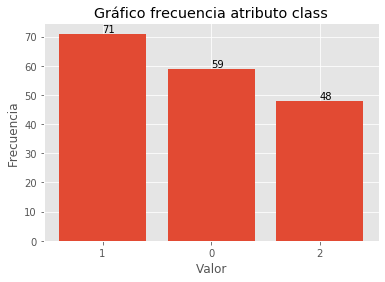

Analisís estadístico básico de alcohol
La media es: 13.05
El promedio es: 13.000617977528083
La desviación estándar es: 0.8118265380058575
La varianza es: 0.6590623278105759
El valor mínimo es 11.03
El valor máximo es 14.83



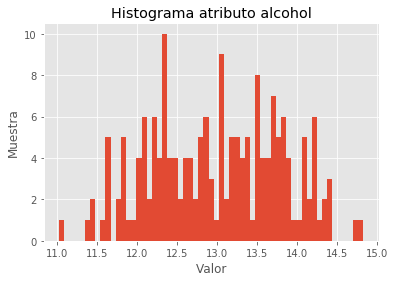

Analisís estadístico básico de magnesium
La media es: 98.0
El promedio es: 99.74157303370787
La desviación estándar es: 14.282483515295665
La varianza es: 203.98933536469244
El valor mínimo es 70.0
El valor máximo es 162.0



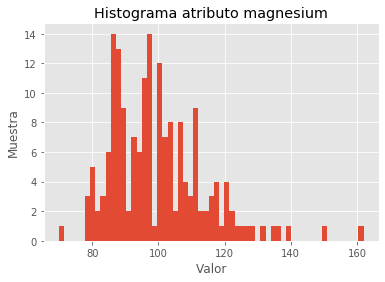

Analisís estadístico básico de color_intensity
La media es: 4.6899999999999995
El promedio es: 5.058089882022473
La desviación estándar es: 2.318285871822413
La varianza es: 5.374449383491404
El valor mínimo es 1.28
El valor máximo es 13.0



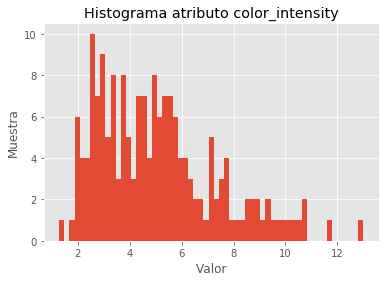

In [3]:
# La única variable categórica es class
plt.style.use('ggplot')

_class = df["class"]
_count = _class.value_counts()
print("La frecuencia de los valores del atributo clase es clase")
print("Valor - Frecuencia")
print(_count)
k = _count.keys()
v = _count.values

plt.title("Gráfico frecuencia atributo class")
plt.ylabel("Frecuencia")
plt.xlabel("Valor")
plt.bar(k, v)

# agrega label
for i in range(len(v)):
    plt.annotate(str(v[i]), (i, v[i]+0.5))
plt.show()


# Variables numéricas
#print(df.describe())


# Más específico o puntual
lista = ["alcohol", "magnesium", "color_intensity"]

for i in lista:
    print("Analisís estadístico básico de {0}".format(i))
    print("La media es: {0}".format(df.median()[i]))
    print("El promedio es: {0}".format(df.mean()[i]))
    print("La desviación estándar es: {0}".format(df.std()[i]))
    print("La varianza es: {0}".format(df.var()[i]))
    print("El valor mínimo es {0}".format(df.min()[i]))
    print("El valor máximo es {0}".format(df.max()[i]))
    print("")
    plt.title("Histograma atributo {0}".format(i))
    plt.ylabel("Muestra")
    plt.xlabel("Valor")
    plt.hist(df[i], bins=int(len(df[i])/3))
    plt.show()
    

# También se puede utilizar bootstrap_plot
# from pandas.plotting import bootstrap_plot
# bootstrap_plot(df['alcohol'], color='blue')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Comentad los resultados.
</div>

Respecto a la variable categórica clase, se puede desprender que existen 3 tipos de vinos, y dada su frecuencia
la que mayor cantidad de registro posee es la clase 1 con 71 registro, mientras que la de menor cantidad de 
registro es la clase 2 con 48, siendo 59 la clase 0.

Sobre los histogramas, el de alcohol se puede observar valores extremos cercano al 11 y 15, y que tiene unos picos
cercanos entre los 12 y 12.5.
El histograma de magnesio representa también valores extremos que deben ser estudiados que rodean el 70 y 162,
se logra visualizar que las mayor cantidad de muestras están concentradas por sobre los 80 y debajo de los 100.

Por último el histograma de densidad de color, también representa valores extremos principalmente los casos cercano
al número 12 y 13, además del 1, ya que todos estos solo tienen una coincidencia. Los valores en su gran mayoría 
se encuentran entre el rango de 2 y 4, lugar en donde se ven la mayor cantidad de picos.


## 2.2 Análisis exploratorio de los datos

En este ejercicio exploraremos la relación de algunos de los atributos numéricos con la variable respuesta ("wine_class"), tanto gráficamente como cualitativamente, y analizaremos las diferentes correlaciones. Para empezar, seleccionaremos solo 3 atributos para explorar: alcohol, magnesium y color_intensity.

In [5]:
feats_to_explore = ['alcohol', 'magnesium', 'color_intensity']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Usando una librería gráfica, como por ejemplo "matplotlib", realizad un gráfico del histograma de valores para cada uno de los atributos seleccionados, separados por los valores de la clase respuesta. Los tres gráficos tienen que estar sobrepuestos, es decir, por ejemplo, en el histograma de la feature "alcohol" tienen que haber en un solo gráfico tres histogramas, uno por cada clase de vino. Añadid una leyenda para saber a que clase corresponde cada histograma.
    
La finalidad es observar como se distribuye cada uno de los atributos en función de la clase que tengan, para poder identificar de manera visual y rápida si algunos atributos permiten diferenciar de forma clara las diferentes clases de vinos.
    
<hr>
Sugerencia: podéis usar el parámetro "alpha" en los gráficos para que se aprecien los tres histogramas.
</div>

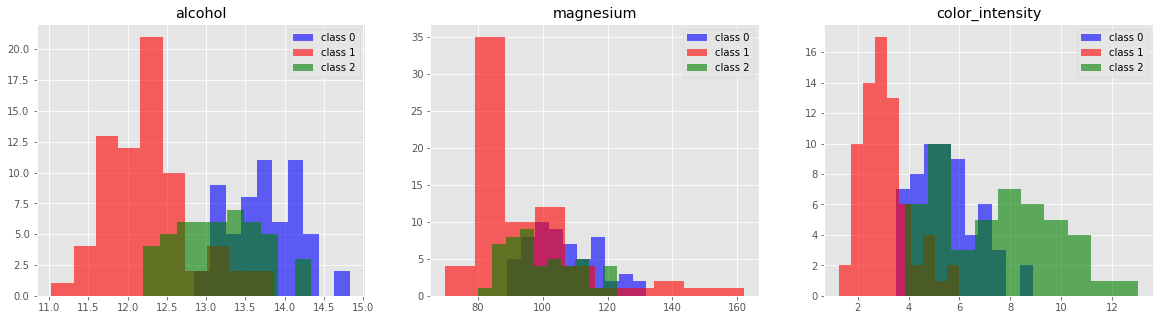

In [6]:
def histogramas(feats_to_explore, mean=False, std=False):
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    group = df.groupby("class")
    colors = ["blue", "red", "green"]
    for i, feat in enumerate(feats_to_explore):
        for num, j in enumerate(df["class"].unique()):
            data_value = group.get_group(j)[feat]
            label = "class {0}".format(j)
            if mean:
                m = data_value.mean()
                ax[i].axvline(m, color=colors[num], zorder=3)
            if std:
                label = label + " - std {0}".format(round(data_value.std(), 3))
            ax[i].hist(data_value, alpha=0.6, label=label, color=colors[num])
            ax[i].set_title(feat)
            ax[i].legend(loc='best')
            
histogramas(feats_to_explore)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿que atributo parece tener más peso a la hora de clasificar un vino? ¿Cual parece tener menos peso? 
</div>


Creo que el atributo que tiene más peso a la hora de clasificar es color_intensity, principalmente porque existe una mejor proyección de los datos, pues si lo trasladamos a una sola dimensionalidad podremos captar una mayor cantidad de datos sin tener solapamientos o perdida de ello. En realidad apunto a que si existe una mayor posibilidad de poder estimar una clasificación está vendría siendo al tener una mejor proyección de los datos.

Dado el argumento anterior, la peor puede estar data en el atributo Magnesium, pues existen solapmientos que no
permiten quizás tener una mejor visibilidad de los datos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Usando los histogramas anteriores, añadid una linia vertical indicando la media de cada uno de los histogramas (tres por gráfico). Pintad las linias del mismo color que el histograma para que quede claro a cual hacen referencia.
    
Añadid a la leyenda, la clase de vino y la desviación estandard en cuestión.

La finalidad es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
    
<hr>
Sugerencia: podeis usar "axvline", de matplotlib axis, para las linias verticales.
</div>

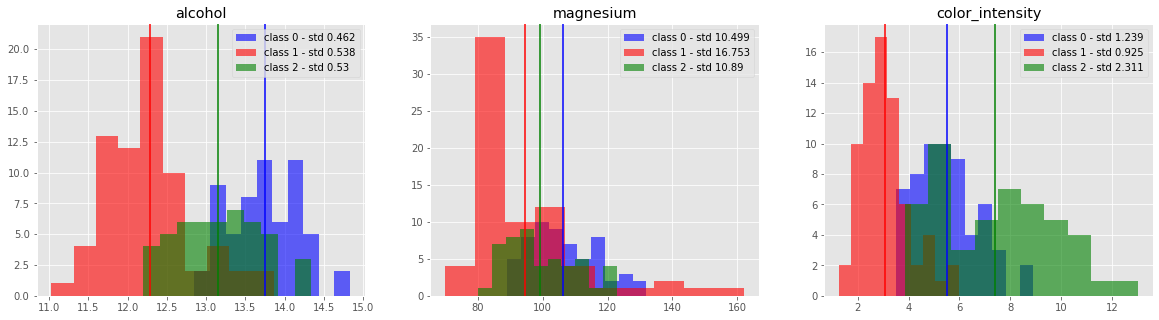

In [7]:
histogramas(feats_to_explore, mean=True, std=True)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Calculad y mostrad la correlación entre las tres variables que estamos analizando.
</div>

In [8]:
df[feats_to_explore].corr()

alcohol  magnesium  color_intensity
alcohol          1.000000   0.270798         0.546364
magnesium        0.270798   1.000000         0.199950
color_intensity  0.546364   0.199950         1.000000

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Representad gráficamente las relaciones entre estas variables (scatterplots). Diferenciad con colores diferentes las diferentes clases.
    
La finalidad es poder observar y analizar las correlaciones de manera gráfica entre algunas de las variables.
    
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn' con el parámetro "hue".
</div>

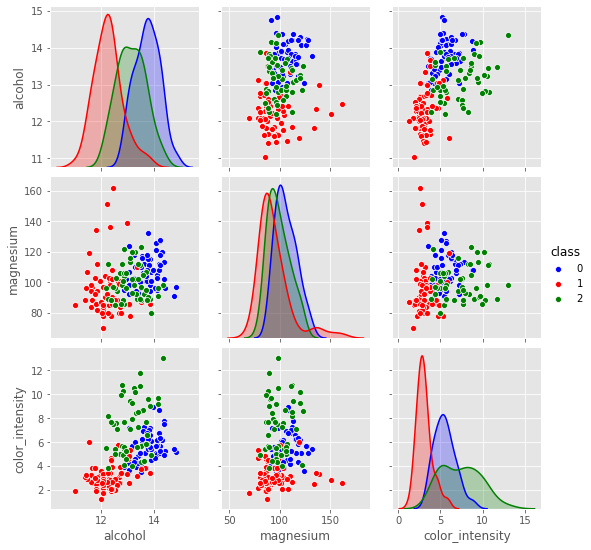

In [9]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
colors = ["blue", "red", "green"]
sns.pairplot(df, hue='class', vars=feats_to_explore, palette=colors)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando las correlaciones, que variables son las que tienen una correlación más fuerte? Cuadra el resultado numérico con el gráfico obtenido?
</div>

La correlación más fuerte se encuentra entre las variables de alcohol y color_intensity.

En los gráficos se puede dar una sensación de similitud respecto a los resultados, pues se puede ver una 
comprender una correlación positiva entre ambos grafos propuestos, incluso más marcado que en las otras 
combinatoria de variables.

# 3. Reducción de la dimensionalidad (2 puntos)

En este ejercicio se aplicarán métodos de reducción de la dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones. Así en vez de trabajar con 3 variables elegidas al azahar, usaremos la información de todos los atributos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Aplicad el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones (el dataset entero con todas las features). Generad un gráfico (en 2D) con el resultado del PCA usando colores diferentes para cada una de las clases de la respuesta (wine_class), con el objetivo de visualizar si es posible separar eficientemente las clases con este método.
    
NOTA: Vigilad de no incluir la variable objetivo "wine class" a la reducción de dimensionalidad. Queremos poder explicar la variable objetivo en funcion del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No es necesario que programéis el algoritmo, podéis usar la implementación disponible en la librería de "scikit-learn".
</div>

Explained variation per principal component: [0.36198848 0.1920749 ]


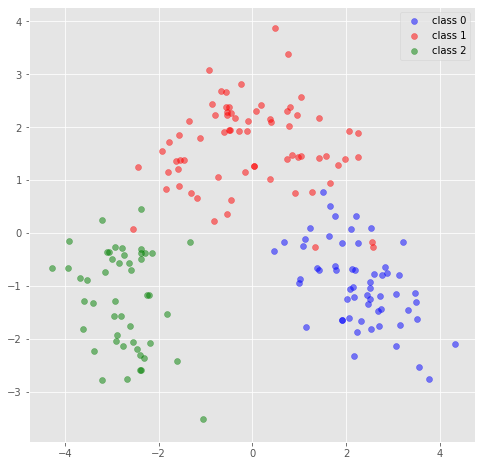

In [10]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.preprocessing import StandardScaler
pcadf = df.copy()
del pcadf["class"]

pcadf = StandardScaler().fit_transform(pcadf)


pca = PCA(n_components=2)
columns = ['dim1', "dim2"]
# reutilizo data ya que no tiene los targets
#data_r = pca.fit_transform(wine.data)
data_r = pca.fit_transform(pcadf)
pcadf = pd.DataFrame(data=data_r,
                     columns=columns)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# Reutilizo los targets
pcadf["class"] = wine.target




def crea_scatter(df):
    group = df.groupby("class")
    colors = ["blue", "red", "green"]
    fig, ax = plt.subplots(1, 1, figsize=(8,8))

    for num, j in enumerate(df["class"].unique()):
        data_value = group.get_group(int(j))
        #print(data_value)
        label = "class {0}".format(j)
        x = data_value[columns[0]]
        y = data_value[columns[1]]
        ax.scatter(x, y, alpha=0.5, label=label, color=colors[num])
        #ax.set_title("Algo")
        ax.legend(loc='best')

crea_scatter(pcadf)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Repetid la reducción de dimensionalidad, pero en este caso usando TSNE. Podeis encontrar más información sobre este algoritmo al link:
    
[https://distill.pub/2016/misread-tsne/](https://distill.pub/2016/misread-tsne/)

Igual que antes, generad un gráfico (en 2D) con el resultado del PCA usando colores diferentes para cada una de las clases de la respuesta (wine_class), con el objetivo de visualizar si es posible separar eficientemente las clases con este método. 

<hr>
Sugerencia: No es necesario que programéis el algoritmo, podéis usar la implementación disponible en la librería de "scikit-learn".

Sugerencia: A parte de especificar el número de componentes, probad de usar el parámetro "perplexity".
</div>

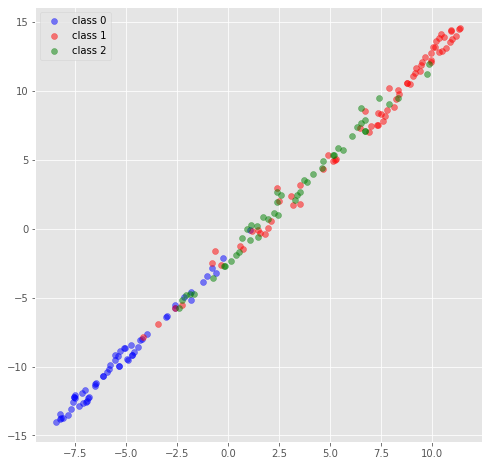

In [11]:
tsne = TSNE()

columns = ['dim1', "dim2"]
# reutilizo variable de data_r de PCA
data_tns = wine.data
data_tns = tsne.fit_transform(data_tns)

tsnedf = pd.DataFrame(data=data_tns,
                      columns=columns)

# target
tsnedf["class"] = wine.target

crea_scatter(tsnedf)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿crees que ha funcionado bien la reducción de dimensionalidad? ¿Ha conseguido separar las clases correctamente? ¿Cual de los dos métodos ha funcionado mejor?
    
¿Por que obtenemos resultados tan diferentes?
</div>

Considero que si se han reducido bien las dimensionalidades, pues al aplicar PCA lo que estamos haciendo, proporcionando un mínimo de variables (2 en este caso) manteniendo matemáticamente la información de como se distribuyen los datos.

Al tener esta distribución se creado un dataframe con sin los targets de clases, para posteriormente ser agregados  y como se observa en el grafo de PCA existe la separación a nivel de clases.

Sobre los métodos, la verdad es que me es complicado decir cual ha funcionado mejor, pues tienen dos formas distintas de como actuar, uno se base en métodos matemáticos (PCA) y TSNE en métodos probabilisticos, pero se puede observar que el método TSNE su gráfica tiene menos "ruido" que PCA, siendo un mejor predictor, aunque el gráfico de PCA puedo considerar que se encuentran mejor agrupado y puedo interpretar que en esta busqueda la mejor representación está dada por PCA.

TSNE está orientado a dataset con grandes niveles de dimensiones, pero en muchas fuentes recomiendas realizar una reducción de dimensionalidad usando PCA y luego aplicar TSNE, tal como se ha realizado ahora.

# 4. Entrenamiento y test (4 puntos)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el clasificador Random Forest, para predecir la clase a la que pertenece cada vino y evaluar la precisión obtenida con el modelo. Para eso usaremos:

    - El conjunto de datos original con todos los atributos
    - El conjunto de datos reducido a solo 2 atributos con PCA
    - El conjunto de datos reducido a solo 2 atributos con TSNE

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Usando el conjunto de datos original:
    
 - Dividid el dataset en train y test.
 - Definid un modelo Random Forest (fijando n_estimators=10 para mantener el modelo simple).
 - Aplicad validación cruzada con el modelo definido y el dataset de train (con cv=5 ya es suficiente).
 - Calculad la media y la desviación standard de la validación cruzada.
    
<hr>
Sugerencia: Para separar entre train y test podéis usar train_test_split de sklearn.

Sugerencia: Para entrenar un modelo random forest podéis usar 'RandomForestClassifier' de sklearn.

Sugerencia: Para aplicar validación cruzada podéis usar 'cross_val_score' de sklearn.
</div>

x_train shape: (133, 13)
y_train shape: (133,)
x_test shape: (45, 13)
y_test shape: (45,)
Accuracy on training set: 1.000
Accuracy on test set: 0.978
Cross-validation scores: [0.92592593 0.96296296 1.         1.         0.92307692]
Mean cross-validation score: 0.96
Standard Deviation cross-validation score: 0.03




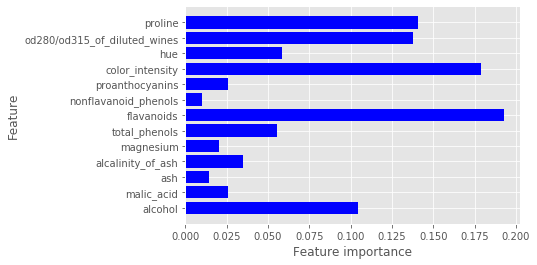

In [12]:
def train_and_test(data, target, prediction=False, n_estimators=100, max_depth=None, min_samples_split=2):

    x_train, x_test, y_train, y_test = train_test_split(data, 
                                                        target,
                                                        test_size=0.25,
                                                        random_state=0)

    print("x_train shape: {}".format(x_train.shape))
    print("y_train shape: {}".format(y_train.shape))
    print("x_test shape: {}".format(x_test.shape))
    print("y_test shape: {}".format(y_test.shape))

    forest = RandomForestClassifier(n_estimators=n_estimators, 
                                    random_state=0,
                                    max_depth=max_depth,
                                    min_samples_split=min_samples_split
                                   )
    forest.fit(x_train, y_train.ravel())

    print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train.ravel())))
    print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))


    scores = cross_val_score(forest, x_train, y_train.ravel(), cv=5)
    print("Cross-validation scores: {}".format(scores))
    print("Mean cross-validation score: {:.2f}".format(scores.mean()))
    print("Standard Deviation cross-validation score: {:.2f}".format(scores.std()))
    print("\n")

    if prediction:
        return forest, [x_train, x_test, y_train, y_test]
    else:
        return forest

def plot_feature_importances_wine(model):
    n_features = wine.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center', color="blue")
    plt.yticks(np.arange(n_features), wine.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")



forest = train_and_test(data=wine.data, target=wine.target)
plot_feature_importances_wine(forest)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Repetid el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con PCA.
</div>

In [13]:
temp_data = pcadf.iloc[:,0:2]
temp_target = pcadf.iloc[:,2]
train_and_test(data=temp_data, target=temp_target)

x_train shape: (133, 2)
y_train shape: (133,)
x_test shape: (45, 2)
y_test shape: (45,)
Accuracy on training set: 1.000
Accuracy on test set: 0.978
Cross-validation scores: [0.92592593 0.88888889 0.96296296 0.96153846 1.        ]
Mean cross-validation score: 0.95
Standard Deviation cross-validation score: 0.04




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Repetid el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con TSNE.
</div>

In [14]:
temp_data = tsnedf.iloc[:,0:2].values
temp_target = tsnedf.iloc[:,2].values
train_and_test(data=temp_data, target=temp_target)

x_train shape: (133, 2)
y_train shape: (133,)
x_test shape: (45, 2)
y_test shape: (45,)
Accuracy on training set: 1.000
Accuracy on test set: 0.689
Cross-validation scores: [0.59259259 0.74074074 0.74074074 0.65384615 0.57692308]
Mean cross-validation score: 0.66
Standard Deviation cross-validation score: 0.07




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Con que datos ha funcionado mejor? ¿Tiene sentido? ¿Cuadra con los resultados que hemos visto en el ejercicio 3?
</div>

El mejor modelo es el generado por PCA (95%) aproximadamente y los datos "en bruto" y muy por debajo se encuentra TSNE. Esto tiene sentido si lo miro desde el punto de vista de agrupamiento de las clases de los datos y por esa razón cuadraría con los datos obtenido en el ejercicio número tres.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Con el mejor modelo que hayáis obtenido:
    
 - Generad predicciones sobre el dataset de test.
 - Calculad la precisión de las predicciones obtenidas y la matriz de confusión asociada.
 
<hr>
Sugerencia: Para calcular la precisión y la matriz de confusión podéis usar las funciones dentro del módulo "metrics" de sklearn.
</div>

In [15]:
# Tomaré el modelo creado con PCA
temp_data = pcadf.iloc[:,0:2]
temp_target = pcadf.iloc[:,2]

# Predicción
# tat = [x_train, x_test, y_train, y_test]
forest, tat = train_and_test(data=temp_data, target=temp_target, prediction=True)
prediction = forest.predict(tat[1])
print("Generación de predicciones: \n{0}\n".format(prediction))

# Matriz de confusión
cm = confusion_matrix(tat[3], prediction)
print("La matriz de confusión: \n{0}\n".format(cm))

# Presión de las predicciones
pp = accuracy_score(tat[3], prediction)
print("La precisión de las predicciones es: {0:.3f}".format(pp))

x_train shape: (133, 2)
y_train shape: (133,)
x_test shape: (45, 2)
y_test shape: (45,)
Accuracy on training set: 1.000
Accuracy on test set: 0.978
Cross-validation scores: [0.92592593 0.88888889 0.96296296 0.96153846 1.        ]
Mean cross-validation score: 0.95
Standard Deviation cross-validation score: 0.04


Generación de predicciones: 
[0 2 1 0 1 0 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]

La matriz de confusión: 
[[16  0  0]
 [ 1 20  0]
 [ 0  0  8]]

La precisión de las predicciones es: 0.978


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> El modelo random forest depende de muchos parámetros. En este ejercicio solo hemos especificado el número de estimadores (n_estimators) y hemos dejado que usara el resto de parámetros por defecto.

Dos parámetros muy útiles en los random forest (y en cualquier modelo que use árboles) son el max_depth y el min_samples_split. Estos parámetros ayudan a controlar el overfitting.
    
Entrenad los modelos anteriores usando diferentes combinaciones de los parámetros:
    
    - n_estimators
    - max_depth
    - min_samples_split
    
¿Has conseguido mejorar el modelo? ¿Como ha ayudado cada parámetro a mejorarlo, es decir, cuál es la finalidad de cada uno de ellos?
</div>

In [16]:
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier

from sklearn.metrics import roc_curve, auc

# Prueba de n_estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for i in n_estimators:
    print("Prueba con n_estimators: {0}".format(i))
    forest, tat = train_and_test(data=temp_data, target=temp_target, prediction=True, n_estimators=i)

# Después del 16 el score no varía, por lo que dejaría esto en 32

# Prueba de max_deepth
max_depths = np.linspace(1, 10, 10, endpoint=True)
#print(max_depths)
for i in max_depths:
    print("Prueba max_depth: {0}".format(i))
    forest, tat = train_and_test(data=temp_data, target=temp_target, prediction=True, max_depth=i)

# El mejor resultado lo obtengo con max_depth = 3, mejorando el resultado en 1 punto.
    
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
for i in min_samples_splits:
    print("Prueba min_samples_splits: {0}".format(i))
    forest, tat = train_and_test(data=temp_data, target=temp_target, prediction=True, min_samples_split=i)

# Con el min_samples_splits en 0.1 mejora el modelo en 1 punto posterior el modelo decae en su rendimiento considerablemente

Prueba con n_estimators: 1
x_train shape: (133, 2)
y_train shape: (133,)
x_test shape: (45, 2)
y_test shape: (45,)
Accuracy on training set: 0.985
Accuracy on test set: 1.000
Cross-validation scores: [0.85185185 0.77777778 0.92592593 0.96153846 1.        ]
Mean cross-validation score: 0.90
Standard Deviation cross-validation score: 0.08


Prueba con n_estimators: 2
x_train shape: (133, 2)
y_train shape: (133,)
x_test shape: (45, 2)
y_test shape: (45,)
Accuracy on training set: 0.955
Accuracy on test set: 0.978
Cross-validation scores: [0.81481481 0.74074074 0.81481481 0.80769231 0.84615385]
Mean cross-validation score: 0.80
Standard Deviation cross-validation score: 0.03


Prueba con n_estimators: 4
x_train shape: (133, 2)
y_train shape: (133,)
x_test shape: (45, 2)
y_test shape: (45,)
Accuracy on training set: 0.970
Accuracy on test set: 0.978
Cross-validation scores: [0.92592593 0.85185185 0.88888889 0.96153846 1.        ]
Mean cross-validation score: 0.93
Standard Deviation cross-va

Cross-validation scores: [0.85185185 0.85185185 0.92592593 0.96153846 1.        ]
Mean cross-validation score: 0.92
Standard Deviation cross-validation score: 0.06


Prueba min_samples_splits: 0.7000000000000001
x_train shape: (133, 2)
y_train shape: (133,)
x_test shape: (45, 2)
y_test shape: (45,)
Accuracy on training set: 0.376
Accuracy on test set: 0.467
Cross-validation scores: [0.37037037 0.37037037 0.37037037 0.38461538 0.38461538]
Mean cross-validation score: 0.38
Standard Deviation cross-validation score: 0.01


Prueba min_samples_splits: 0.8
x_train shape: (133, 2)
y_train shape: (133,)
x_test shape: (45, 2)
y_test shape: (45,)
Accuracy on training set: 0.376
Accuracy on test set: 0.467
Cross-validation scores: [0.37037037 0.37037037 0.37037037 0.38461538 0.38461538]
Mean cross-validation score: 0.38
Standard Deviation cross-validation score: 0.01


Prueba min_samples_splits: 0.9
x_train shape: (133, 2)
y_train shape: (133,)
x_test shape: (45, 2)
y_test shape: (45,)
Accuracy o

Sí el modelo mejora en relación a lo obtenido, utilizando n_estimators (mejora en 1 puntos), max_depth también logra mejorar en 1 punto, pero min_samples_splits lo mantiene.

El criterio máximo logrado fue:
n_estimators = 16, después de se vuelve constante y decae
max_depths = 3, que llega a pico y luego decae
min_samples_splits = 0.1 - 0.2 mantiene el resultado, luego de ello decae.

n_estimators, refiere al número de arboles generados para el forest. He leído que por lo general, cuanto mayor sea el número de árboles, mejor aprenderá los datos. Sin embargo, agregar muchos árboles puede ralentizar considerablemente el proceso de entrenamiento, por lo tanto, se debe hacer una búsqueda para encontrar el punto óptimo.

Max_depths, refiere a profundidad máxima del árbol. Si ninguno, los nodos "se expanden" hasta que todos nodos sean vacios o hasta que los nodos contengan menos de min_samples_split samples. En otras palabras cuanto más profundo es el árbol, más divisiones tiene y captura más información sobre los datos.

min_samples_splits: representa el número mínimo de muestras necesarias para dividir un nodo, y cuando se aumenta este parámetro, cada árbol en el forest se vuelve más restringido ya que tiene que considerar más muestras en cada nodo, hay la razón en este caso de que los primeros dos iteradores son los más apropiados en este caso.

